In [22]:
import pandas as pd

In [ ]:
gpu_model = "1080ti"
ai_model = "llama3.2"
default_timestamp = "20250218_095048"
eval_timestamp = "20250218_094335"
path = f"../"
inference_load = pd.read_csv(
    f"{path}inference.load.test_{gpu_model}_{ai_model}_{eval_timestamp}.csv",
    parse_dates=["StartTime", "EndTime"],
)
nvidia_log = pd.read_csv(
    f"{path}inference.nvidia_smi_log.test_{gpu_model}_{ai_model}_{eval_timestamp}.csv",
    parse_dates=["timestamp"],
)
default_inference_load = pd.read_csv(
    f"{path}inference.load.none_{gpu_model}_{ai_model}_{default_timestamp}.csv",
    parse_dates=["StartTime", "EndTime"],
)
default_nvidia_log = pd.read_csv(
    f"{path}inference.nvidia_smi_log.none_{gpu_model}_{ai_model}_{default_timestamp}.csv",
    parse_dates=["timestamp"],
)

In [24]:
# get total timespace from inference_load; we will only count from start of first inference to end of last
end_time = inference_load["EndTime"].max()
start_time = inference_load["StartTime"].min()
total_time = end_time - start_time
print(f"Total time (agent): {total_time}")

Total time (agent): 0 days 00:00:56.556000


In [25]:
# get total timespace from inference_load; we will only count from start of first inference to end of last
default_end_time = default_inference_load["EndTime"].max()
default_start_time = default_inference_load["StartTime"].min()
default_total_time = default_end_time - default_start_time
print(f"Total time (default): {default_total_time}")

Total time (default): 0 days 00:04:06.629000


In [26]:
# filter nvidia log to only include data from start of first inference to end of last
nvidia_log = nvidia_log[
    (nvidia_log["timestamp"] >= start_time) & (nvidia_log["timestamp"] <= end_time)
]
default_nvidia_log = default_nvidia_log[
    (default_nvidia_log["timestamp"] >= default_start_time)
    & (default_nvidia_log["timestamp"] <= default_end_time)
]

In [27]:
# calculate total watt-seconds of each row
nvidia_log["time_since_last"] = nvidia_log["timestamp"].diff().dt.total_seconds()
nvidia_log["watt_seconds"] = nvidia_log["power.draw(W)"] * nvidia_log["time_since_last"]
nvidia_log.head()

,timestamp,index,name,utilization.gpu(%),utilization.memory(%),clocks_throttle_reasons.sw_power_cap,clocks_throttle_reasons.sw_thermal_slowdown,memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
5,2025-02-18 09:43:36.162,0,NVIDIA GeForce GTX 1080 Ti,0,9,Not Active,Not Active,11264,6499,4608,52,734,810,250.0,25.95,NaN,NaN
6,2025-02-18 09:43:36.365,0,NVIDIA GeForce GTX 1080 Ti,4,2,Not Active,Not Active,11264,6399,4708,53,1480,5508,250.0,63.66,0.203,12.92298
7,2025-02-18 09:43:36.558,0,NVIDIA GeForce GTX 1080 Ti,1,1,Not Active,Not Active,11264,6491,4616,53,1480,5508,250.0,64.14,0.193,12.37902
8,2025-02-18 09:43:36.723,0,NVIDIA GeForce GTX 1080 Ti,4,2,Not Active,Not Active,11264,6507,4600,53,1480,5508,250.0,64.13,0.165,10.58145
9,2025-02-18 09:43:36.891,0,NVIDIA GeForce GTX 1080 Ti,1,1,Not Active,Not Active,11264,6507,4600,54,1480,5508,250.0,64.04,0.168,10.75872


In [28]:
# calculate total watt-seconds of each row
default_nvidia_log["time_since_last"] = default_nvidia_log["timestamp"].diff().dt.total_seconds()
default_nvidia_log["watt_seconds"] = (
    default_nvidia_log["power.draw(W)"] * default_nvidia_log["time_since_last"]
)
default_nvidia_log.head()

,timestamp,index,name,utilization.gpu(%),utilization.memory(%),clocks_throttle_reasons.sw_power_cap,clocks_throttle_reasons.sw_thermal_slowdown,memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
5,2025-02-18 09:50:49.131,0,NVIDIA GeForce GTX 1080 Ti,6,13,Not Active,Not Active,11264,6532,4575,54,734,810,250.0,26.34,NaN,NaN
6,2025-02-18 09:50:49.317,0,NVIDIA GeForce GTX 1080 Ti,4,2,Not Active,Not Active,11264,6433,4674,54,1480,5508,250.0,64.05,0.186,11.91330
7,2025-02-18 09:50:49.528,0,NVIDIA GeForce GTX 1080 Ti,1,1,Not Active,Not Active,11264,6433,4674,54,1480,5508,250.0,64.33,0.211,13.57363
8,2025-02-18 09:50:49.716,0,NVIDIA GeForce GTX 1080 Ti,4,2,Not Active,Not Active,11264,6541,4566,54,1480,5508,250.0,64.33,0.188,12.09404
9,2025-02-18 09:50:49.880,0,NVIDIA GeForce GTX 1080 Ti,0,1,Not Active,Not Active,11264,6541,4566,55,1480,5508,250.0,64.33,0.164,10.55012


<Axes: >

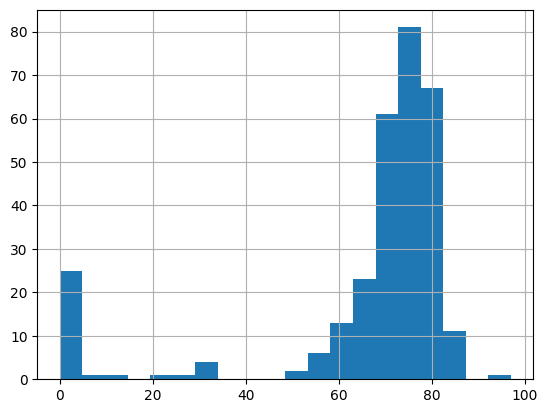

In [29]:
# show histogram of time spent in different gpu load levels
nvidia_log["utilization.gpu(%)"].hist(bins=20)

<Axes: >

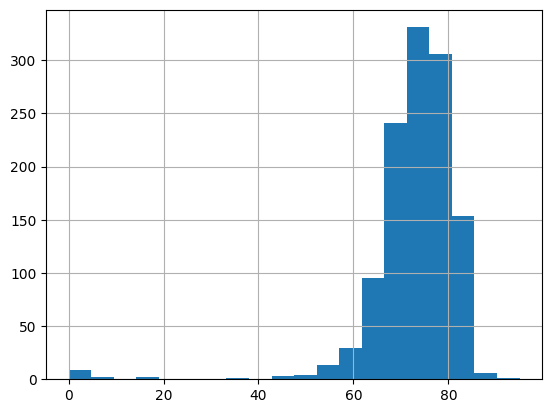

In [30]:
default_nvidia_log["utilization.gpu(%)"].hist(bins=20)

In [31]:
# print total watt-seconds
total_watt_seconds = nvidia_log["watt_seconds"].sum()
print(f"Total watt-seconds (agent): {total_watt_seconds}")
default_total_watt_seconds = default_nvidia_log["watt_seconds"].sum()
print(f"Total watt-seconds (default): {default_total_watt_seconds}")

Total watt-seconds (agent): 10564.350410000001
Total watt-seconds (default): 38538.625049999995


In [32]:
# print total tokens
total_tokens = inference_load["TotalTokens"].sum()
print(f"Total tokens (agent): {total_tokens}")
default_total_tokens = default_inference_load["TotalTokens"].sum()
print(f"Total tokens (default): {default_total_tokens}")

Total tokens (agent): 3348.0
Total tokens (default): 15693.0


In [33]:
# create a table with columns for total time, total watt-seconds, total tokens and tokens per watt-second and tokens per second
summary = pd.DataFrame(
    columns=[
        "total_time",
        "total_watt_seconds",
        "total_tokens",
        "tokens_per_watt_second",
        "tokens_per_second",
    ]
)
summary.loc["agent"] = [
    total_time,
    total_watt_seconds,
    total_tokens,
    total_tokens / total_watt_seconds,
    total_tokens / total_time.total_seconds(),
]
summary.loc["default"] = [
    default_total_time,
    default_total_watt_seconds,
    default_total_tokens,
    default_total_tokens / default_total_watt_seconds,
    default_total_tokens / default_total_time.total_seconds(),
]
summary

,total_time,total_watt_seconds,total_tokens,tokens_per_watt_second,tokens_per_second
agent,0 days 00:00:56.556000,10564.35041,3348.0,0.316915,59.197963
default,0 days 00:04:06.629000,38538.62505,15693.0,0.407202,63.629987


In [34]:
# calculate percent diff in total_watt_seconds and tokens_per_second
percent_diff_total_watt_seconds = (
    (total_watt_seconds - default_total_watt_seconds) / default_total_watt_seconds * 100
)
percent_diff_tokens_per_second = (
    (summary.loc["agent"]["tokens_per_second"] - summary.loc["default"]["tokens_per_second"])
    / summary.loc["default"]["tokens_per_second"]
    * 100
)
percent_diff_tokens_per_watt_second = (
    (
        summary.loc["agent"]["tokens_per_watt_second"]
        - summary.loc["default"]["tokens_per_watt_second"]
    )
    / summary.loc["default"]["tokens_per_watt_second"]
    * 100
)
print(
    f"Percent diff in agent from default in total watt-seconds (don't take too much from this as this isn't normalized): {percent_diff_total_watt_seconds}"
)
print(f"Percent diff in agent from default in tokens per second: {percent_diff_tokens_per_second}")
print(
    f"Percent diff in agent from default in tokens per watt-second: {percent_diff_tokens_per_watt_second}"
)

Percent diff in agent from default in total watt-seconds (don't take too much from this as this isn't normalized): -72.58763021178412
Percent diff in agent from default in tokens per second: -6.965306591062609
Percent diff in agent from default in tokens per watt-second: -22.172533564146548
